In [1]:
#Data.csv

**Step 1: Importing the libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

**Step 2: Importing dataset**

In [3]:
df = pd.read_csv('Data (1).csv')
df.head(2)

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes


In [4]:
df.shape

(10, 4)

**Step 3: Handling the missing data**

In [5]:
df.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

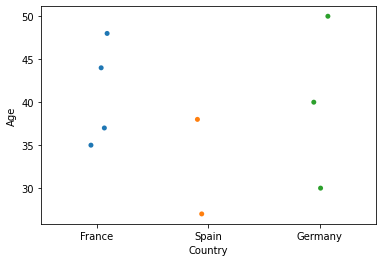

In [6]:
sns.stripplot(df['Country'], df['Age'])
plt.show()

Age vary on Country so we have to replace based on their country

In [7]:
df.head(10)

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [8]:
sp_age = df[df['Country'] == 'Spain']['Age'].mean()

In [9]:
df['Age'].fillna(sp_age, inplace = True)

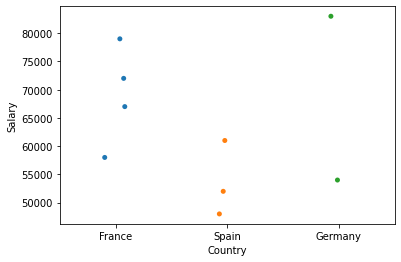

In [10]:
sns.stripplot(df['Country'], df['Salary'])
plt.show()

In [11]:
ger_salary = df[df['Country'] == 'Germany']['Salary'].mean()

In [12]:
df['Salary'].fillna(ger_salary, inplace = True)

**Step 4: Encoding categorical data**

In [13]:
df.head(2)

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes


In [14]:
df['Purchased'] = df['Purchased'].replace({
    'Yes':1,
    'No':0
})

**Step 5: Creating a dummy variable**

In [15]:
countries = pd.get_dummies(df['Country'], drop_first= True)

In [16]:
df_new = pd.concat([df, countries], axis=1)

In [17]:
df_new.head(2)

,Country,Age,Salary,Purchased,Germany,Spain
0,France,44.0,72000.0,0,0,0
1,Spain,27.0,48000.0,1,0,1


In [18]:
df_new.drop(['Country'], axis = 1, inplace = True)

In [19]:
df_new.head(2)

,Age,Salary,Purchased,Germany,Spain
0,44.0,72000.0,0,0,0
1,27.0,48000.0,1,0,1


**Step 6: Splitting the datasets into training sets and Test sets**

In [20]:
X = df_new.drop(['Purchased'], axis = 1).copy()
y = df_new['Purchased'].copy()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

**Step 7: Feature Scaling**

In [22]:
df_new.head(2)

,Age,Salary,Purchased,Germany,Spain
0,44.0,72000.0,0,0,0
1,27.0,48000.0,1,0,1


In [23]:
sc = MinMaxScaler()

In [24]:
X_train_sc = sc.fit_transform(X_train)

In [25]:
X_test_sc = sc.fit_transform(X_test)

---